# Data retreival and Cleaning

Data can be found at the Zenodo as [Brazil STAR Project Surveys](https://zenodo.org/record/3958956#.Xxq8cufTVhE)

# Imports

In [1]:
#Imports

import numpy as np
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling as pp
import pprint 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import requests 
from zipfile import ZipFile

In [ ]:
#Downlaod Data-Set

#Survey and Zip Name
zip_file = "survey_data.zip"
survey_name = "Brazil_Survey_Q1.xlsx"

r = requests.get("https://zenodo.org/record/3958956/files/Brazil_STAR_Surveys.zip?download=1", stream=True)
with open(zip_file, 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(chunk)
        
#Etract only Q1 that was used in the analysis
with ZipFile(zip_file, 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   if survey_name in listOfFileNames:
        zipObj.extract(survey_name, survey_name)
        
        
data = pd.read_excel(os.path.join(survey_name,survey_name), sheet_name=0, header = 1)

# Creating Groups

In [3]:
names = ['What is the purpose of the use of \nFirewood? ','What is the purpose of the use of Charcoal ?','What is the purpose of the use of LPG?']

base = ['Community name','Where do you normally cook? ','What is the family\'s monthly income? (Brazil´s Minimum Wage R$937.00)',
         'Resident:  Permanent ','Gender (M or F)','Age','Civil state','Education','House','How many meals a day? ','. How many people eat at home daily? ',
       'How many contribute to the family\'s monthly income? ','Which is the main one?']
men = ['How many men until 5 years old?', 'How many men from 6 to 10?', 'How many men from 11 to 15? ', 'How many men from 16 to 20? ',
             'How many men from 21 to 40? ', 'How many men over 40 years old?']
women = ['How many women until 5 years old?', 'How many women from 6 to 10?',
             'How many women from 11 to 15? ', 'How many women from 16 to 20? ','How many women from 21 to 40? ', 'How many women over 40 years old?']

labels={0: "Nan",
        1:"Firewood",
        2:"Charcoal - Firewood",
        3:"Charcoal",
        4:"LPG - Firewood",
        5:"LPG - Charcoal - Firewood",
        6:"LPG - Charcoal",
        7:"LPG"}

int_df = data[names+ base + men + women]
print("Input Categories:")
display(int_df.groupby(names).size())

    
int_df['Category'] = 0
int_df['Ord_Cat'] = 0
#Binary Categorisation
for i in range(len(names)):
    int_df.loc[int_df[names[i]].str.contains('|'.join(["cook","manioc"]),na=False), "Category"] = int_df['Category'] + 2**i
#Reorder categires so the cleaner fuels have higher values
int_df.loc[int_df['Category'] == 0,'Ord_Cat'] = 0 #NAN Variable
int_df.loc[int_df['Category'] == 1,'Ord_Cat'] = 1 #Firewood worst option
int_df.loc[int_df['Category'] == 2,'Ord_Cat'] = 3 #Charcoal better than charcoal and firewood
int_df.loc[int_df['Category'] == 3,'Ord_Cat'] = 2 #charcoal and firewood slight improvement over firewood
int_df.loc[int_df['Category'] == 4,'Ord_Cat'] = 7 #Only LPG is Best
int_df.loc[int_df['Category'] == 5,'Ord_Cat'] = 4 #LPG and FIrewood worst LPG Combination
int_df.loc[int_df['Category'] == 6,'Ord_Cat'] = 6 #LPG and CHarcoal second best option
int_df.loc[int_df['Category'] == 7,'Ord_Cat'] = 5 #Mix of three is slightly better than LPG and Firewood

for f_c in labels.keys():
    int_df.loc[int_df['Ord_Cat'] == f_c,'FuelChoice'] = labels[f_c]

print("\nResulting Categories:")
nan_show_df = int_df.fillna("NaN")
display(nan_show_df.groupby(['Category','Ord_Cat','FuelChoice']).size())   

#Drop Useless ones 
base.append("FuelChoice")
int_df = int_df[base + men + women]
display(int_df.sample(10))

Input Categories:


What is the purpose of the use of \nFirewood?   What is the purpose of the use of Charcoal ?  What is the purpose of the use of LPG?
Make manioc flour                               To cook                                       To cook                                    1
Make manioc flour;To cook                       To cook                                       To cook                                    2
To cook                                         To cook                                       To cook                                   78
                                                                                              To cook;Refrigerator                       1
To cook; Make manioc flour                      To cook                                       To cook                                    2
dtype: int64


Resulting Categories:


Category  Ord_Cat  FuelChoice               
0         0        Nan                           4
1         1        Firewood                      2
2         3        Charcoal                      5
3         2        Charcoal - Firewood           3
4         7        LPG                          32
5         4        LPG - Firewood               33
6         6        LPG - Charcoal               16
7         5        LPG - Charcoal - Firewood    84
dtype: int64

,Community name,Where do you normally cook?,What is the family's monthly income? (Brazil´s Minimum Wage R$937.00),Resident: Permanent,Gender (M or F),Age,Civil state,Education,House,How many meals a day?,. How many people eat at home daily?,How many contribute to the family's monthly income?,Which is the main one?,FuelChoice,How many men until 5 years old?,How many men from 6 to 10?,How many men from 11 to 15?,How many men from 16 to 20?,How many men from 21 to 40?,How many men over 40 years old?,How many women until 5 years old?,How many women from 6 to 10?,How many women from 11 to 15?,How many women from 16 to 20?,How many women from 21 to 40?,How many women over 40 years old?
57,Monte Sinai,built-in kitchen,1 MW,Y,F,15-25,Married,Incompleted high school,Own home,3,3,NaN,NaN,LPG - Charcoal - Firewood,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
113,Santa Isabel,built-in kitchen,1-2 MW,Y,F,37-45,Married,Incompleted high school,Own home,4,4,NaN,Agriculture,LPG - Firewood,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
56,Monte Sinai,built-in kitchen,1 MW,Y,F,37-45,Married,Incompleted elementary school,Own home,3,3,1,NaN,Charcoal,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
143,Terra Preta,built-in kitchen,1 MW,Y,M,15-25,Single,Completed high school,Own home,4,8,2,handicraft,LPG - Firewood,0.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
176,Três unitos,built-in kitchen,1 MW,NaN,F,26-36,Married,Incompleted high school,Own home,4,4,2,Fishing,LPG - Charcoal - Firewood,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43,Marajá,built-in kitchen,1 MW,Y,F,>56,Other union,Incompleted elementary school,Own home,2,2,2,Agriculture,LPG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95,Pagodão,built-in kitchen,1 MW,Y,F,37-45,Single,Incompleted elementary school,Own home,3,2,1,Fishing,LPG - Firewood,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71,Nova Sugar caneã,built-in kitchen,1-2MW,NaN,M,37-46,Married,Incompleted elementary school,Own home,3,4,1,NaN,LPG - Firewood,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30,Chita,built-in kitchen,1 MW,,F,>56,Married,Incompleted elementary school,Own home,3,6,,Manioc,LPG - Charcoal - Firewood,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
102,Pagodão,NaN,1 MW,Y,M,37-45,Other union,Completed Elementary School,Own home,6,6,3,commerce,LPG - Charcoal,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


# Men and Women in House

In [4]:
print("For Men Grounds:",men)
int_df["Number_Men"] = int_df[men].sum(axis=1).astype('int64')
print("For Women Grounds:",women)
int_df["Number_Women"] = int_df[women].sum(axis=1).astype('int64')
display(int_df[men+women+['Number_Men','Number_Women']].sample(5))

base.append("Number_Men")
base.append("Number_Women")
int_df = int_df[base]

For Men Grounds: ['How many men until 5 years old?', 'How many men from 6 to 10?', 'How many men from 11 to 15? ', 'How many men from 16 to 20? ', 'How many men from 21 to 40? ', 'How many men over 40 years old?']
For Women Grounds: ['How many women until 5 years old?', 'How many women from 6 to 10?', 'How many women from 11 to 15? ', 'How many women from 16 to 20? ', 'How many women from 21 to 40? ', 'How many women over 40 years old?']


,How many men until 5 years old?,How many men from 6 to 10?,How many men from 11 to 15?,How many men from 16 to 20?,How many men from 21 to 40?,How many men over 40 years old?,How many women until 5 years old?,How many women from 6 to 10?,How many women from 11 to 15?,How many women from 16 to 20?,How many women from 21 to 40?,How many women over 40 years old?,Number_Men,Number_Women
137,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
42,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,3,3
89,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,2
145,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,2
37,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


# Income Source

In [5]:
print("Unique - ", "Which is the main one?", int_df['Which is the main one?'].unique())
clean_is = int_df['Which is the main one?'].to_frame()
clean_is[clean_is['Which is the main one?'].isin(['-'])]= np.nan
clean_is[clean_is['Which is the main one?'].isin(['Agriculture;Fishing'])]= "Fishing"
clean_is[clean_is['Which is the main one?'].isin(['School director;teacher','teacheres','School director','teacher','school principal','I work at the health post','Nurse','Health agent'])]= "Public Service"
clean_is[clean_is['Which is the main one?'].isin(['Husband Retirement'])]= "Retirement"
clean_is[clean_is['Which is the main one?'].isin(['Agriculture;Breeding','Breeding',"Manioc"])]= "Agriculture"
clean_is[clean_is['Which is the main one?'].isin(['wooden boat caulk','CarregarWood','Handicraft',"woodwork"])]= "Handicraft"
clean_is[clean_is['Which is the main one?'].isin(['handicraft','handicraft;I work at the health post','House made','Make manioc flour'])]= "Handicraft"
clean_is[clean_is['Which is the main one?'].isin(['sale of skewers;breu;vine','Make skewers',"Make skewer"])]= "Handicraft"
clean_is[clean_is['Which is the main one?'].isin(['Mason Helper','Sawdust','Clear yard',])]= "Manual Labour"
clean_is[clean_is['Which is the main one?'].isin(['Make school lunch','Tourism','Mercearia;band','General Services','Public agent'])]= 'Services'
clean_is[clean_is['Which is the main one?'].isin(['sale of skewers;breu;vine','snacks sale;Mason','sale of skewers','Bread sales','Sale of fruits','Counter',"commerce"])]= "Commerce"
print("Unique - ", "Which is the main one?", clean_is['Which is the main one?'].unique())

int_df['Which is the main one?'] = clean_is['Which is the main one?']
display(int_df.sample(5))

Unique -  Which is the main one? ['woodwork' nan 'Fishing' 'commerce' '-' 'Agriculture'
 'Agriculture;Fishing' 'wooden boat caulk' 'snacks sale;Mason' 'teacheres'
 'CarregarWood' 'Clear yard' 'Manioc' 'School director;teacher' 'teacher'
 'Retirement' 'Make manioc flour' 'Make skewer'
 'sale of skewers;breu;vine' 'sale of skewers' 'General Services'
 'Public agent' 'Bread sales' 'handicraft' 'Health agent' 'House made'
 'Sawdust' 'Breeding' 'Sale of fruits' 'Make school lunch'
 'school principal' 'Handicraft' 'Agriculture;Breeding' 'Counter'
 'Husband Retirement' 'Make skewers' 'Mason Helper'
 'handicraft;I work at the health post' 'Mercearia;band'
 'I work at the health post' 'Nurse' 'Tourism' 'School director']
Unique -  Which is the main one? ['Handicraft' nan 'Fishing' 'Commerce' 'Agriculture' 'Public Service'
 'Manual Labour' 'Retirement' 'Services']


,Community name,Where do you normally cook?,What is the family's monthly income? (Brazil´s Minimum Wage R$937.00),Resident: Permanent,Gender (M or F),Age,Civil state,Education,House,How many meals a day?,. How many people eat at home daily?,How many contribute to the family's monthly income?,Which is the main one?,FuelChoice,Number_Men,Number_Women
77,Nova Esperança,built-in kitchen,1-2 MW,Y,F,15-25,Other union,Incompleted high school,Own home,3,4,2,Handicraft,LPG - Charcoal - Firewood,2,1
63,Nova Sugar caneã,built-in kitchen,1 MW,NaN,F,37-45,Married,Incompleted elementary school,Own home,3,4,2,Handicraft,LPG - Firewood,1,3
114,Santa Isabel,built-in kitchen,NaN,Y,F,>56,Widow,Does not know how to read,Own home,3,3,NaN,Commerce,LPG - Charcoal - Firewood,1,1
35,Chita,built-in kitchen,2-5 MW,Y,F,37-45,Single,Incompleted elementary school,Own home,2,6,2,Agriculture,LPG - Firewood,2,3
75,Nova Sugar caneã,built-in kitchen,1 MW,NaN,M,26-36,Married,Incompleted elementary school,Community House,3,4,1,Agriculture,LPG - Firewood,3,3


# Checking unique values for each and sorting outliers

In [6]:
# for c_name in int_df.keys():
#     print("\n----Checking unqiue values for:",c_name)
#     print(list(int_df[c_name].unique()))

print("\n\n Fixing issues:")    
 
##Community
print("\nSorting  - ","Community name")
print("Before: ",list(int_df["Community name"].unique()))
int_df.loc[int_df["Community name"].isin([' Terra Preta ']),"Community name"]= 'Terra Preta'
print("After: ",list(int_df["Community name"].unique()))

## Cooking Habits
localVar = 'Where do you normally cook? '
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['not tem']),localVar]= "There is no kitchen"
int_df.loc[int_df[localVar].isin([' ']),localVar] =  np.nan
print("After: ",list(int_df[localVar].unique()))

## Monthly Income
localVar  = 'What is the family\'s monthly income? (Brazil´s Minimum Wage R$937.00)'
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['1MW','1 mW']),localVar]= '1 MW'
int_df.loc[int_df[localVar].isin(['1-2MW','1-2 Mw']),localVar]= '1-2 MW'
int_df.loc[int_df[localVar].isin(['10-20MW']),localVar]= '10-20 MW'
int_df.loc[int_df[localVar].isin([0]),localVar] =  '0 MW'
int_df.loc[int_df[localVar].isin(['-']),localVar] =  np.nan
print("After: ",list(int_df[localVar].unique()))

## 'Resident:  Permanent '
localVar  = 'Resident:  Permanent '
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['y']),localVar]= 'Y'
int_df.loc[int_df[localVar].isin([' ']),localVar] =  np.nan
print("After: ",list(int_df[localVar].unique()))

## 'Gender (M or F)'
localVar  = 'Gender (M or F)'
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['f']),localVar]= 'F'
int_df.loc[int_df[localVar].isin(['m']),localVar]= 'M'
int_df.loc[int_df[localVar].isin(['Y']),localVar] =  np.nan
print("After: ",list(int_df[localVar].unique()))

## 'Age'
localVar  = 'Age'
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['15 - 25','15-25','15-26']),localVar]= '15-25'
int_df.loc[int_df[localVar].isin(['26-35','16-35']),localVar]= '26-36'
int_df.loc[int_df[localVar].isin(['37-46']),localVar]= '37-45'
int_df.loc[int_df[localVar].isin([56,'>65','>56']),localVar]= '>56'
int_df.loc[int_df[localVar].isin([' ']),localVar] =  np.nan
print("After: ",list(int_df[localVar].unique()))



## 'Civil state'
localVar  = 'Civil state'
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['Separado']),localVar]= 'Separated'
int_df.loc[int_df[localVar].isin(['divorced']),localVar]= 'Divorced'
print("After: ",list(int_df[localVar].unique()))

## 'Education'
localVar  = 'Education'
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['Completed the upper couser']),localVar]= 'Completed the upper course'
print("After: ",list(int_df[localVar].unique()))

## 'How many meals a day? '
localVar  = 'How many meals a day? '
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['eat at the mother']),localVar]= np.nan
print("After: ",list(int_df[localVar].unique()))

##  '. How many people eat at home daily? '
localVar  = '. How many people eat at home daily? '
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin([' ']),localVar]= np.nan
print("After: ",list(int_df[localVar].unique()))

## 'How many contribute to the family\'s monthly income? '
localVar  = 'How many contribute to the family\'s monthly income? '
print("\nSorting  - ",localVar)
print("Before: ",list(int_df[localVar].unique()))
int_df.loc[int_df[localVar].isin(['Bolsa familia']),localVar]= 0
int_df.loc[int_df[localVar].isin(['-', 'Do not know',' ']),localVar]= np.nan
print("After: ",list(int_df[localVar].unique()))

display(int_df.sample(5))



 Fixing issues:

Sorting  -  Community name
Before:  ['Aruaú', 'Baixote', 'Chita', 'Marajá', 'Monte Sinai', 'Nova Sugar caneã', 'Nova Esperança', 'Pagodão', 'Santa Isabel', 'Santo Antônio', 'São Tomé', ' Terra Preta ', 'Tiririca', 'Três unitos']
After:  ['Aruaú', 'Baixote', 'Chita', 'Marajá', 'Monte Sinai', 'Nova Sugar caneã', 'Nova Esperança', 'Pagodão', 'Santa Isabel', 'Santo Antônio', 'São Tomé', 'Terra Preta', 'Tiririca', 'Três unitos']

Sorting  -  Where do you normally cook? 
Before:  ['built-in kitchen', 'There is no kitchen', 'Outdoor kitchen', nan, ' ', 'not tem']
After:  ['built-in kitchen', 'There is no kitchen', 'Outdoor kitchen', nan]

Sorting  -  What is the family's monthly income? (Brazil´s Minimum Wage R$937.00)
Before:  ['1 MW', '1-2 MW', '1MW', '2-5 MW', 0, '5-10 MW', '10-20MW', '-', nan, '1-2MW', '1-2 Mw', '1 mW']
After:  ['1 MW', '1-2 MW', '2-5 MW', '0 MW', '5-10 MW', '10-20 MW', nan]

Sorting  -  Resident:  Permanent 
Before:  ['Y', 'y', nan, ' ']
After:  ['Y', 

,Community name,Where do you normally cook?,What is the family's monthly income? (Brazil´s Minimum Wage R$937.00),Resident: Permanent,Gender (M or F),Age,Civil state,Education,House,How many meals a day?,. How many people eat at home daily?,How many contribute to the family's monthly income?,Which is the main one?,FuelChoice,Number_Men,Number_Women
48,Monte Sinai,built-in kitchen,1 MW,Y,F,26-36,Married,Completed high school,Own home,4,4,2,Commerce,LPG - Charcoal - Firewood,2,2
56,Monte Sinai,built-in kitchen,1 MW,Y,F,37-45,Married,Incompleted elementary school,Own home,3,3,1,NaN,Charcoal,3,1
116,Santo Antônio,built-in kitchen,1 MW,Y,M,26-36,Married,Incompleted high school,Own home,3,2,2,Handicraft,LPG - Charcoal - Firewood,1,3
158,Três unitos,built-in kitchen,NaN,Y,F,>56,Married,Incompleted elementary school,Own home,3,9,NaN,NaN,LPG - Firewood,3,3
163,Três unitos,built-in kitchen,1-2 MW,Y,M,26-36,Other union,Completed high school,Own home,4,5,3,Handicraft,LPG - Charcoal,2,3


# Saving
* Saving final results as Cleaned version 

In [7]:
int_df.to_csv("cleaned_survey.csv")

# Prepping Data for Machine Learning - Saving 
* Making all categorical values into numbers
* [Optional]Removing NaN's by replacing them with 0's 
* Removing instances that don't belong to the 4 main groups
* Re-numbering the group to be 1,2,3,4

In [8]:
#Initial Data
display(int_df.sample(5))

# Fuel CHoice cutdown
print("Fuel Choice distriutions")
display(int_df.groupby(['FuelChoice']).size()) 
print("Original Size:",len(int_df))
fuel_choices = ['LPG - Firewood','LPG - Charcoal - Firewood','LPG - Charcoal','LPG']
int_df = int_df[int_df['FuelChoice'].isin(fuel_choices)]
print("Trimmed Size:",len(int_df))



# Replacing Values using Map 
replace_map = {}

#Simple category where we asume that the order of the category is irrelevant
simple_category_list = ['Community name','Where do you normally cook? ','Resident:  Permanent ','Gender (M or F)','Civil state',
                       'House','Which is the main one?']

for col_var in simple_category_list:
    labels = int_df[col_var].astype('category').cat.categories.tolist()
    replace_map[col_var] = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}

    
    
replace_map["What is the family's monthly income? (Brazil´s Minimum Wage R$937.00)"] = {
    '0 MW':1,
    '1 MW':2,
    '1-2 MW':3,
    '2-5 MW':4,
    '5-10 MW':5,
    '10-20 MW':6}    

replace_map['Age'] = {
    '15-25':1,
    '26-36':2,
    '37-45':3,
     '46-55':4,
     '>56':5}   
    
replace_map['Education'] = {
    'Does not know how to read':1,
    'Can read and write':2,
    'Incompleted elementary school':3,
    'Completed Elementary School':4,
    'Incompleted high school':5,
    'Completed high school':6,
    'Completed the upper course':7}

replace_map['FuelChoice'] = {
    'LPG - Firewood':1,
    'LPG - Charcoal - Firewood':2,
    'LPG - Charcoal':3,
    'LPG':4}

print("\nResulting equivalence:")
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(replace_map)
                     
#Do replace
int_df.replace(replace_map, inplace=True)#

#Ensure all values are convertable to int - not str categorical date etc. 
for col in  int_df.keys():
    int_df[col] = pd.to_numeric(int_df[col],downcast='integer',errors='raise')

display(int_df.sample(5))

#Fillna with 0, as no values use 0 in the case of Meals a day, people eat at home, contribution, num_men and num_women this might be an issue.
#int_df = int_df.fillna(0)

#Save DF
int_df.to_csv("ml_preppred_surve.csv")

,Community name,Where do you normally cook?,What is the family's monthly income? (Brazil´s Minimum Wage R$937.00),Resident: Permanent,Gender (M or F),Age,Civil state,Education,House,How many meals a day?,. How many people eat at home daily?,How many contribute to the family's monthly income?,Which is the main one?,FuelChoice,Number_Men,Number_Women
97,Pagodão,built-in kitchen,1 MW,Y,F,26-36,Married,Completed high school,Own home,5,5,1,NaN,LPG - Firewood,3,2
44,Marajá,built-in kitchen,1 MW,Y,M,26-36,Single,Incompleted elementary school,Own home,3,1,1,Agriculture,LPG - Charcoal - Firewood,1,0
145,Terra Preta,built-in kitchen,1 MW,Y,M,26-36,Other union,Completed high school,Own home,4,5,3,Handicraft,LPG - Charcoal - Firewood,4,2
13,Baixote,built-in kitchen,1 MW,Y,F,15-25,Single,Completed Elementary School,Own home,2,5,1,Fishing,LPG - Charcoal - Firewood,1,4
37,Marajá,built-in kitchen,1-2 MW,Y,F,>56,Single,Incompleted elementary school,Own home,2,2,2,Retirement,LPG - Charcoal - Firewood,3,0


Fuel Choice distriutions


FuelChoice
Charcoal                      5
Charcoal - Firewood           3
Firewood                      2
LPG                          32
LPG - Charcoal               16
LPG - Charcoal - Firewood    84
LPG - Firewood               33
Nan                           4
dtype: int64

Original Size: 179
Trimmed Size: 165

Resulting equivalence:
{'Age': {'15-25': 1, '26-36': 2, '37-45': 3, '46-55': 4, '>56': 5},
 'Civil state': {'Married': 1,
                 'Other union': 2,
                 'Separated': 3,
                 'Single': 4,
                 'Widow': 5},
 'Community name': {'Aruaú': 1,
                    'Baixote': 2,
                    'Chita': 3,
                    'Marajá': 4,
                    'Monte Sinai': 5,
                    'Nova Esperança': 6,
                    'Nova Sugar caneã': 7,
                    'Pagodão': 8,
                    'Santa Isabel': 9,
                    'Santo Antônio': 10,
                    'São Tomé': 11,
                    'Terra Preta': 12,
                    'Tiririca': 13,
                    'Três unitos': 14},
 'Education': {'Can read and write': 2,
               'Completed Elementary School': 4,
               'Completed high school': 6,
               'Completed the upper course': 7,
              

,Community name,Where do you normally cook?,What is the family's monthly income? (Brazil´s Minimum Wage R$937.00),Resident: Permanent,Gender (M or F),Age,Civil state,Education,House,How many meals a day?,. How many people eat at home daily?,How many contribute to the family's monthly income?,Which is the main one?,FuelChoice,Number_Men,Number_Women
64,7,3.0,3.0,NaN,2.0,5,1,6.0,5,3.0,5.0,1.0,3.0,1,5,1
173,14,3.0,2.0,1.0,1.0,3,4,5.0,5,5.0,3.0,1.0,4.0,2,1,2
34,3,3.0,6.0,NaN,1.0,3,1,7.0,3,4.0,3.0,3.0,6.0,1,1,2
133,11,3.0,2.0,1.0,1.0,3,1,3.0,5,4.0,5.0,NaN,3.0,2,3,2
93,6,3.0,2.0,1.0,NaN,4,4,3.0,5,2.0,2.0,1.0,1.0,4,1,1


## Normalised qq and distplots

QQ plots


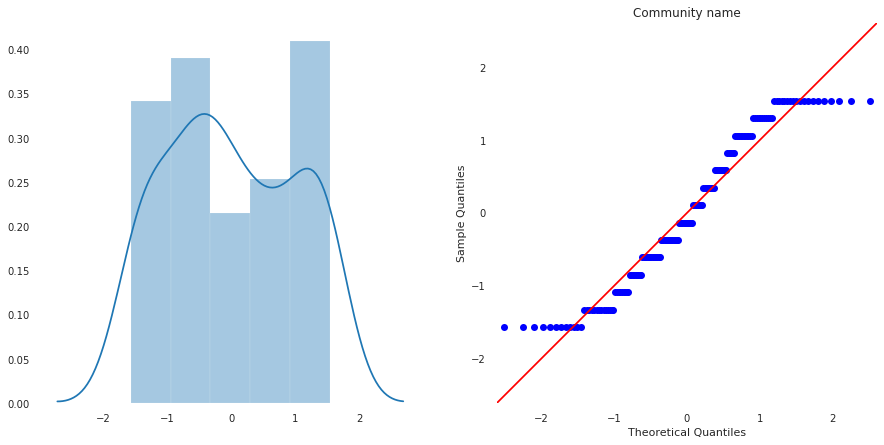

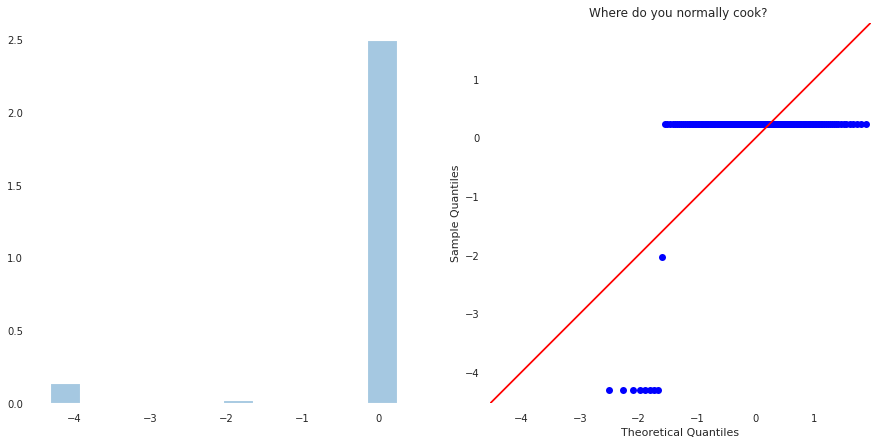

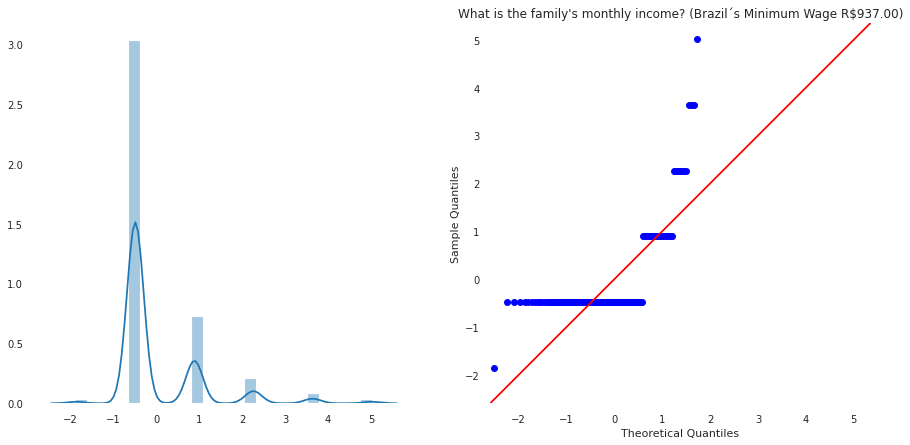

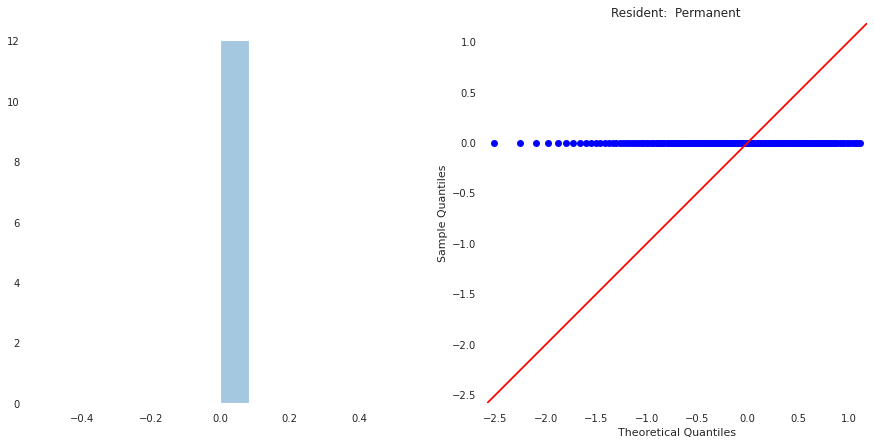

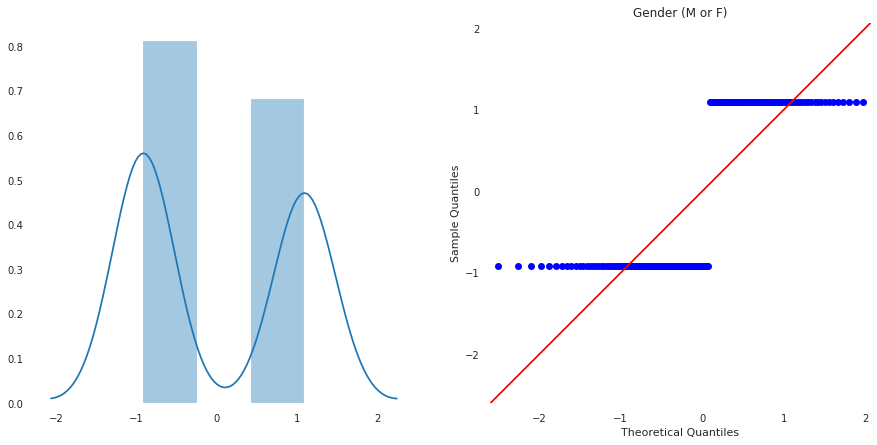

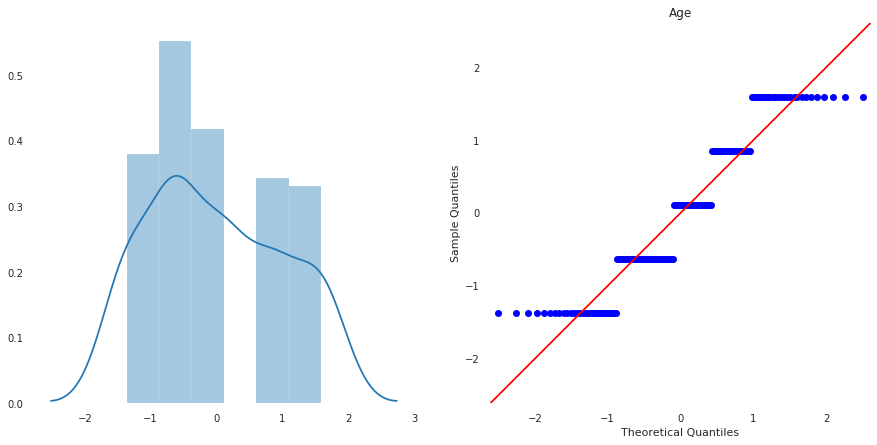

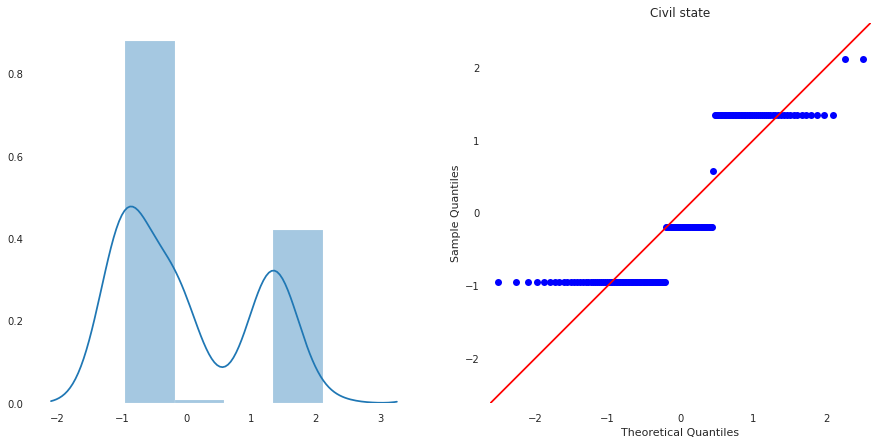

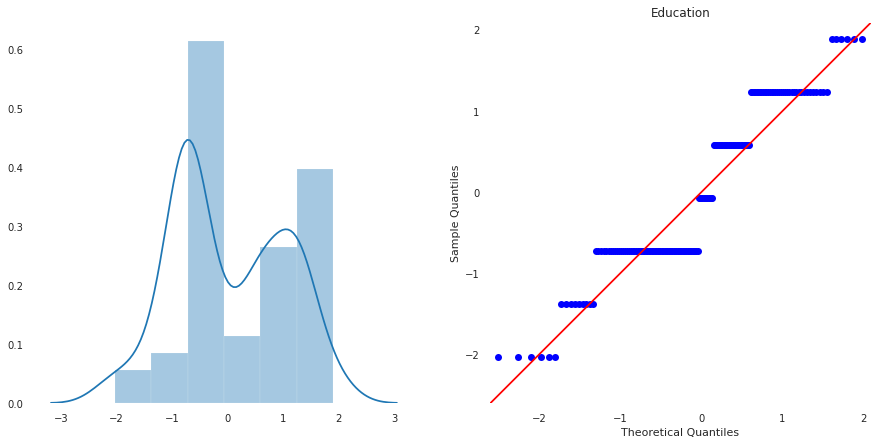

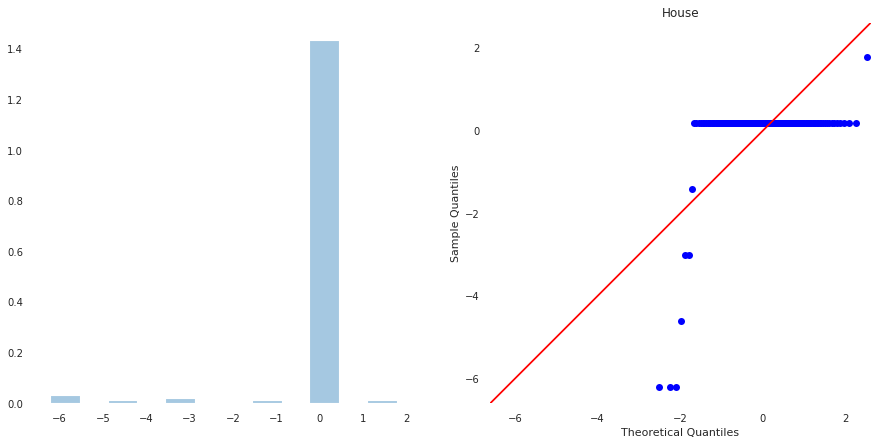

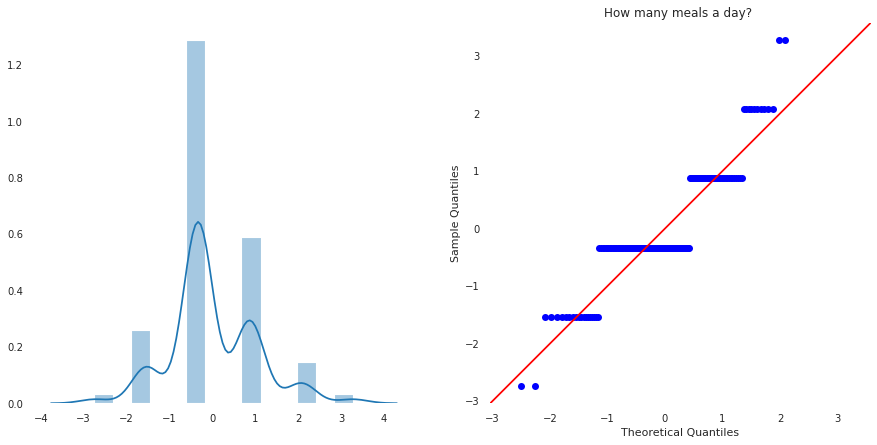

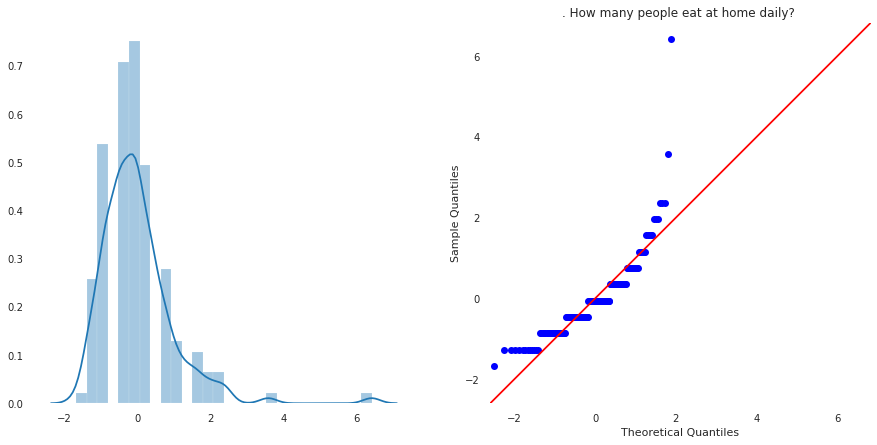

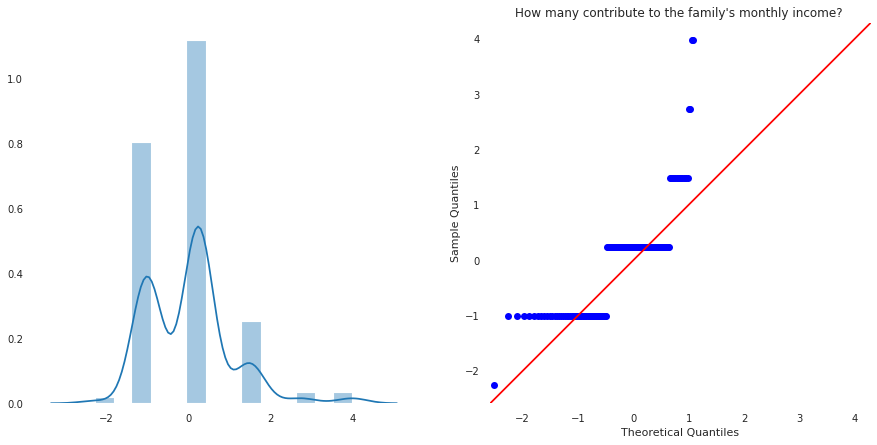

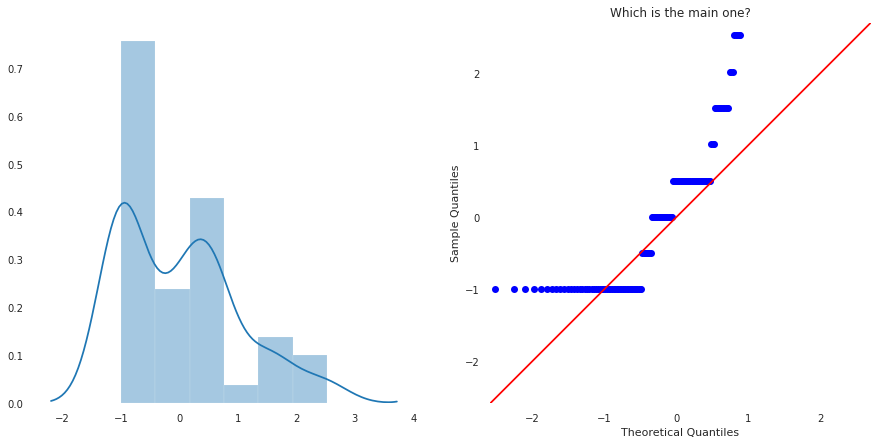

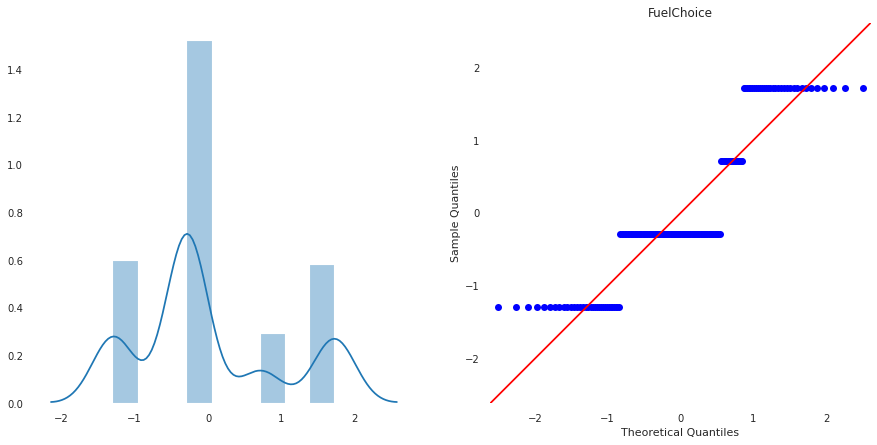

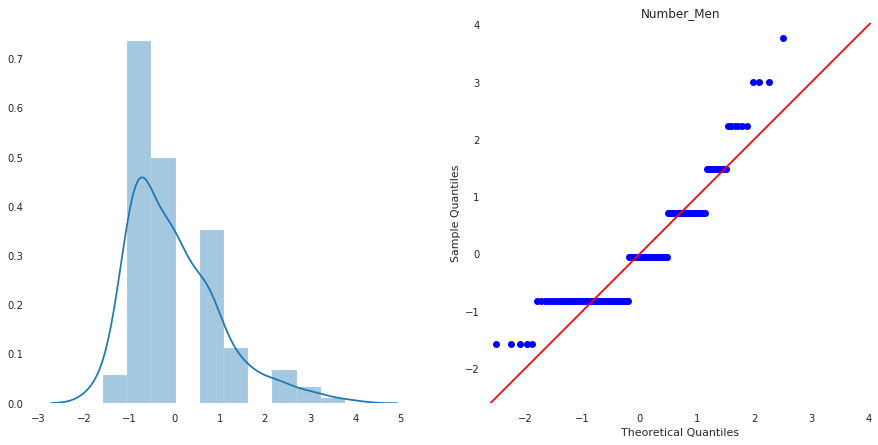

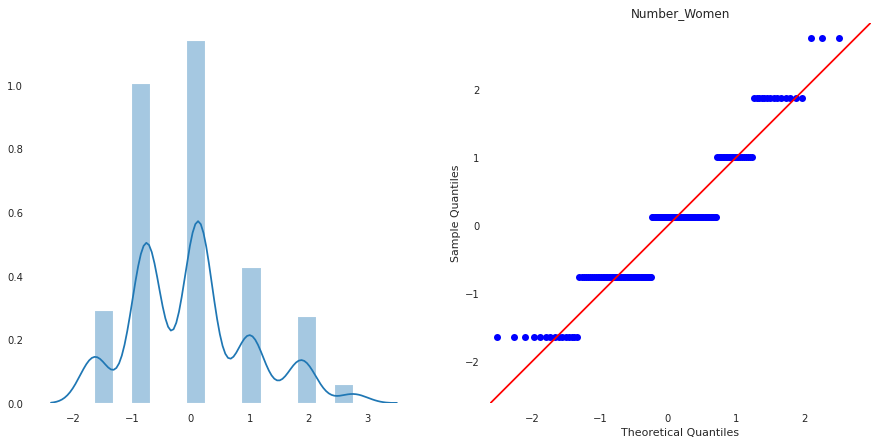

In [9]:
import numpy as np 
import pylab 
import scipy.stats as stats
from sklearn import preprocessing
print("QQ plots")


import numpy as np 
import statsmodels.api as sm 
import pylab as py 

x = int_df.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
int_df2 = pd.DataFrame(x_scaled)

%matplotlib inline
f_size = (15,7)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

for key in int_df2.keys():
    fig,(ax,ax2) = plt.subplots(1,2,figsize=f_size) 
    sns.distplot(int_df2[key].values,ax=ax)
    sm.qqplot(int_df2[key].values, line ='45',ax=ax2) 
    plt.title(int_df.keys()[key])
    plt.show()